<a href="https://colab.research.google.com/github/Superkid0714/ML-DL_practice/blob/main/Titanic_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_(%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [ ]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [ ]:
# Tensorflow
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model

In [ ]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [ ]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

## Titanic 생존자 예측 모델

###  데이터 준비

In [ ]:
train_org_df = pd.read_csv( 'titanic_train.csv' )
test_org_df = pd.read_csv( 'titanic_test.csv' )

In [ ]:
train_org_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss....",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. J...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. Willi...",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_org_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. Jam...",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thoma...",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. A...",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_org = test_org_df.copy()
train_org = train_org_df.copy()

## 2. 데이터 전처리


### 불필요한 데이터 삭제

In [ ]:
test_org.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace = True)

In [ ]:
train_org.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace = True)

In [ ]:
train_org

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 결측치 처리

In [ ]:
train_org.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
test_org.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
train_org.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [ ]:
test_org.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64

In [ ]:
# Age 변수 결측치 처리 - 객실별 등급별 평균 나이로 대체
pclass_1_avg_age = train_org[train_org['Pclass']==1]['Age'].mean()
pclass_2_avg_age = train_org[train_org['Pclass']==2]['Age'].mean()
pclass_3_avg_age = train_org[train_org['Pclass']==3]['Age'].mean()

def replace_average_age(cols):
  age = cols [0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return pclass_1_avg_age
    elif pclass ==2:
      return pclass_2_avg_age
    else:
      return pclass_3_avg_age
  else:
    return age

train_org['Age'] = train_org[ [ 'Age', 'Pclass' ] ].apply( replace_average_age, axis = 1 )

In [ ]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# Age 변수 결측치 처리 - 객실별 등급별 평균 나이로 대체
pclass_1_avg_age = test_org[test_org['Pclass']==1]['Age'].mean()
pclass_2_avg_age = test_org[test_org['Pclass']==2]['Age'].mean()
pclass_3_avg_age = test_org[test_org['Pclass']==3]['Age'].mean()

def replace_average_age(cols):
  age = cols [0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return pclass_1_avg_age
    elif pclass ==2:
      return pclass_2_avg_age
    else:
      return pclass_3_avg_age
  else:
    return age

test_org['Age'] = test_org[ [ 'Age', 'Pclass' ] ].apply( replace_average_age, axis = 1 )

In [ ]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
train_org.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
test_org.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
train_org[ 'Embarked' ].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
train_org[ 'Embarked' ].describe()[ 'top' ]

'S'

In [ ]:
train_org[ 'Embarked' ] = train_org[ 'Embarked' ].fillna( train_org[ 'Embarked' ].describe()[ 'top' ] )

In [ ]:
train_org.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test_org.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
test_org['Fare'] = test_org['Fare'].fillna(test_org['Fare'].mean())

In [ ]:
test_org.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 3. EDA

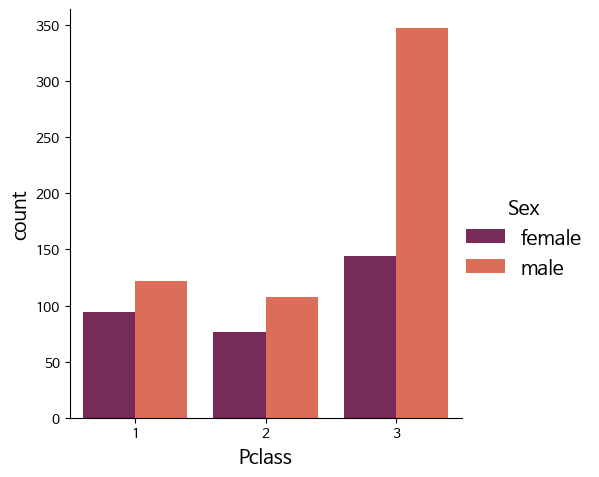

In [ ]:
# 객실별 성별 인원수
sns.catplot(x='Pclass',data = train_org, kind = 'count', hue = 'Sex', palette = 'rocket')

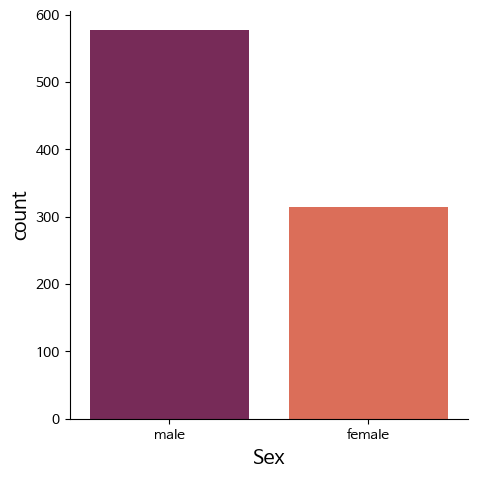

In [ ]:
# 성별 인원수
sns.catplot(x='Sex', data =train_org, kind = 'count', palette= 'rocket')

<Axes: xlabel='Pclass', ylabel='Survived'>

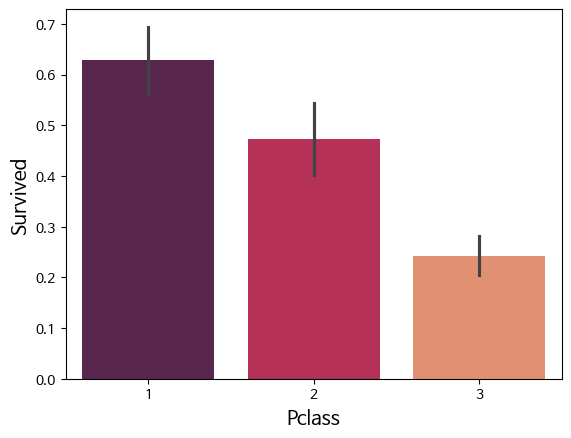

In [ ]:
# 객식별 생존 비율
sns.barplot (x='Pclass', y='Survived', data=train_org, palette = 'rocket')

<Axes: >

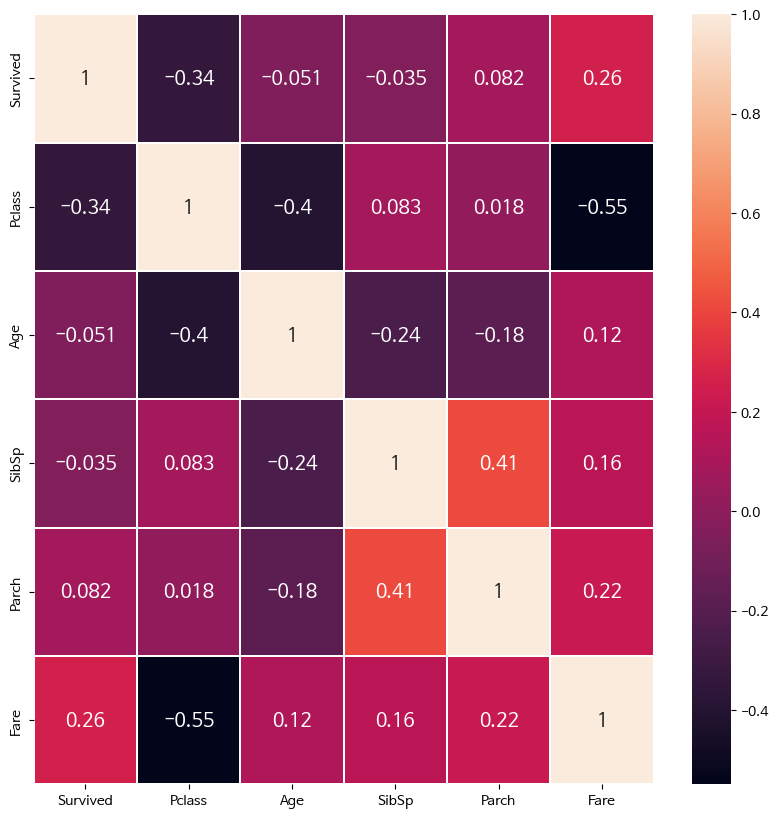

In [ ]:
plt.subplots(figsize =(10,10))
sns.heatmap (train_org[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
             annot = True, linewidths = .2)

### 4. DNN을 위한 전처리

In [ ]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
features = ['Sex','Embarked']
for feature in features:
  le = LabelEncoder()
  le.fit(train_org[feature])
  train_org[feature] = le.transform(train_org[feature])

In [ ]:
train_org['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [ ]:
train_org['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [ ]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
features = ['Sex','Embarked']
for feature in features:
  le = LabelEncoder()
  le.fit(test_org[feature])
  test_org[feature] = le.transform(test_org[feature])

In [ ]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


## 5. 데이터 분리

In [ ]:
y = train_org['Survived'].to_numpy()
x = train_org.drop(['Survived'], axis =1).to_numpy()

In [ ]:
x.shape, y.shape

((891, 7), (891,))

In [ ]:
X_final_test = test_org.to_numpy()

In [ ]:
X_final_test.shape

(418, 7)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    x,y, test_size = 0.2, random_state = 42
)

In [ ]:
X_train.shape, y_train.shape

((712, 7), (712,))

### 훈련용 데이터 스케일 변환

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_vaild = scaler.fit_transform(X_valid)
X_final_test = scaler.fit_transform(X_final_test)


## 6. 신경망 모델링

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = [X_train.shape[1]]))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 7)                 0         
                                                                 
 batch_normalization_2 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 128)               1024      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100,
                    batch_size = 128,
                    validation_data = (X_valid, y_valid))

Epoch 1/100
6/6 [==============================] - 2s 63ms/step - loss: 0.6498 - accuracy: 0.6404 - val_loss: 1.2950 - val_accuracy: 0.5866
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6071 - accuracy: 0.6812 - val_loss: 1.2282 - val_accuracy: 0.6201
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5665 - accuracy: 0.7177 - val_loss: 1.3159 - val_accuracy: 0.6760
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5254 - accuracy: 0.7528 - val_loss: 1.4588 - val_accuracy: 0.6816
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5204 - accuracy: 0.7640 - val_loss: 1.6979 - val_accuracy: 0.6927
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4981 - accuracy: 0.7879 - val_loss: 1.9391 - val_accuracy: 0.7095
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4925 - accuracy: 0.7935 - val_loss: 2.1402 - val_accuracy: 0.6927
Epoch 8/100
6/6 [===

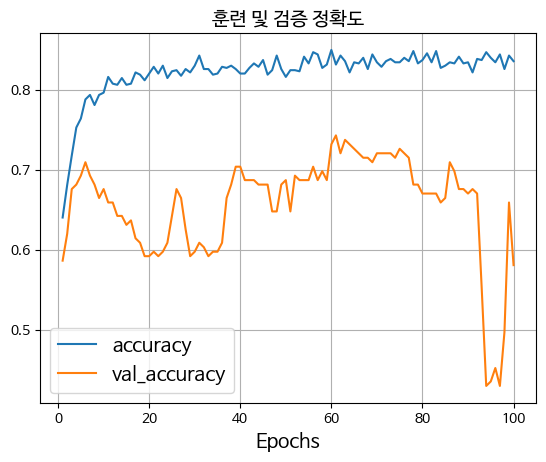

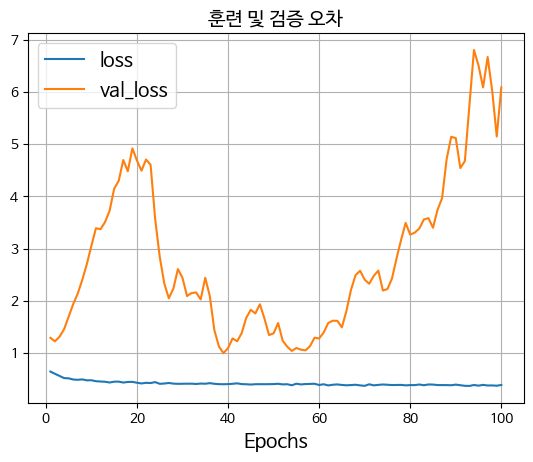

In [ ]:
disp_training(history)

In [ ]:
loss, accuracy = model.evaluate(X_valid,y_valid)

print(f'accuracy: {accuracy:.3f}')

6/6 [==============================] - 0s 4ms/step - loss: 6.0854 - accuracy: 0.5810
accuracy: 0.581


In [ ]:
y_pred = model.predict( X_final_test )

14/14 [==============================] - 0s 2ms/step


In [ ]:
y_pred[ 0 ]

array([0.10240477], dtype=float32)